# Numpy Exercise 4

## Imports

In [9]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

## Complete graph Laplacian

In discrete mathematics a [Graph](http://en.wikipedia.org/wiki/Graph_%28mathematics%29) is a set of *vertices* or *nodes* that are connected to each other by *edges* or *lines*. If those *edges* don't have directionality, the graph is said to be *undirected*. Graphs are used to model social and communications networks (Twitter, Facebook, Internet) as well as natural systems such as molecules.

A [Complete Graph](http://en.wikipedia.org/wiki/Complete_graph), $K_n$ on $n$ nodes has an edge that connects each node to every other node.

Here is $K_5$:

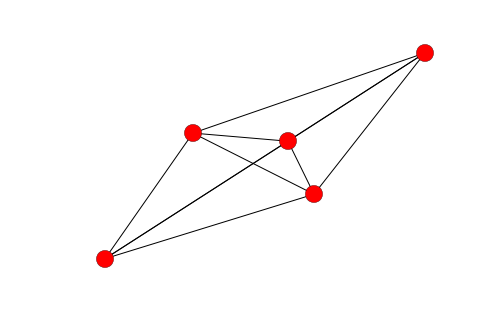

In [10]:
import networkx as nx
K_5=nx.complete_graph(5)
nx.draw(K_5)

The [Laplacian Matrix](http://en.wikipedia.org/wiki/Laplacian_matrix) is a matrix that is extremely important in graph theory and numerical analysis. It is defined as $L=D-A$. Where $D$ is the degree matrix and $A$ is the adjecency matrix. For the purpose of this problem you don't need to understand the details of these matrices, although their definitions are relatively simple.

The degree matrix for $K_n$ is an $n \times n$ diagonal matrix with the value $n-1$ along the diagonal and zeros everywhere else. Write a function to compute the degree matrix for $K_n$ using NumPy.

In [23]:
def complete_deg(n):
    """Return the integer valued degree matrix D for the complete graph K_n."""
    matrix = np.ones((n), dtype=np.int64)
    D = (n-1)*(np.diag(matrix))
    return D

In [24]:
print complete_deg(5)

[[4 0 0 0 0]
 [0 4 0 0 0]
 [0 0 4 0 0]
 [0 0 0 4 0]
 [0 0 0 0 4]]


In [25]:
D = complete_deg(5)
assert D.shape==(5,5)
assert D.dtype==np.dtype(int)
assert np.all(D.diagonal()==4*np.ones(5))
assert np.all(D-np.diag(D.diagonal())==np.zeros((5,5),dtype=int))

The adjacency matrix for $K_n$ is an $n \times n$ matrix with zeros along the diagonal and ones everywhere else. Write a function to compute the adjacency matrix for $K_n$ using NumPy.

In [26]:
def complete_adj(n):
    """Return the integer valued adjacency matrix A for the complete graph K_n."""
    matrix = np.ones((n), dtype=np.int64)
    D = np.diag(matrix)
    A = matrix - D
    return A

In [40]:
print complete_adj(5)

[[0 1 1 1 1]
 [1 0 1 1 1]
 [1 1 0 1 1]
 [1 1 1 0 1]
 [1 1 1 1 0]]


In [27]:
A = complete_adj(5)
assert A.shape==(5,5)
assert A.dtype==np.dtype(int)
assert np.all(A+np.eye(5,dtype=int)==np.ones((5,5),dtype=int))

Use NumPy to explore the eigenvalues or *spectrum* of the Laplacian *L* of $K_n$. What patterns do you notice as $n$ changes? Create a *conjecture* about the general Laplace *spectrum* of $K_n$.

In [41]:
print np.linalg.eigvals(complete_deg(2)-complete_adj(2))
print np.linalg.eigvals(complete_deg(5)-complete_adj(5))
print np.linalg.eigvals(complete_deg(10)-complete_adj(10))

[ 2.  0.]
[ 5.  0.  5.  5.  5.]
[ 10.   0.  10.  10.  10.  10.  10.  10.  10.  10.]


All but one of the eigenvalues are equal to n